# XPECTO Epidemic 2.0 Competition System - Tutorial

Welcome to the XPECTO Epidemic 2.0 Competition! This tutorial will guide you through using the competition system, from getting started to developing advanced strategies.

## Contents
1. [Getting Started](#getting-started)
2. [Understanding the Competition Framework](#understanding-the-competition-framework)
3. [Running Your First Simulation](#running-your-first-simulation)
4. [Creating Intervention Strategies](#creating-intervention-strategies)
5. [Understanding the Scoring System](#understanding-the-scoring-system)
6. [Practice vs. Official Attempts](#practice-vs-official-attempts)
7. [Advanced Strategies](#advanced-strategies)
8. [Submitting and Viewing Results](#submitting-and-viewing-results)

## Getting Started

First, let's set up our environment and import the necessary modules.

In [1]:
# Add the project root to the path
import sys
import os
from pathlib import Path

# Add parent directory to path for imports
sys.path.append(str(Path.cwd().parent))

# Import required modules
from src.competition import CompetitionManager
from src.mirage.engines import EngineV1 as Engine

# Import visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization
plt.style.use('seaborn-whitegrid')
sns.set(font_scale=1.2)
pd.set_option('display.max_columns', None)

Testing mode enabled: EngineV1 replaced with MockEngine


### Initialize the Competition Manager

The Competition Manager is your primary interface to the competition system. It coordinates between the epidemic simulation engine and the competition tracking components.

In [2]:
# Create an epidemic engine
engine = Engine()

# Create competition manager with your name
competition = CompetitionManager(data_dir="tutorial_data", engine=engine)

# Register as a player - use your real name for the competition!
player_id = competition.setup_player(name="Your Name", email="your.email@example.com")
print(f"Your player ID is: {player_id}")

Player registered: Your Name (ID: db70fe54-ea5a-48d0-9ab8-7bebc99e4b71)
Your player ID is: db70fe54-ea5a-48d0-9ab8-7bebc99e4b71


## Understanding the Competition Framework

The competition system consists of several key components:

1. **Players**: Competitors registered in the system
2. **Scenarios**: Standardized epidemic situations with fixed parameters
3. **Attempts**: Each run of the simulation with your intervention strategy
4. **Scoring**: Multi-factor evaluation of your performance
5. **Leaderboard**: Rankings based on your best official attempts

Let's explore the available scenarios:

In [3]:
# List available scenarios
competition.list_available_scenarios()

,ID,Name,Difficulty,R0,Resources
0,standard,Standard Outbreak,standard,2.5,1000
1,challenging,Challenging Outbreak,challenging,3.5,700


[{'id': 'standard',
  'name': 'Standard Outbreak',
  'description': 'A standard epidemic outbreak scenario with normal parameters.',
  'seed': 'standard_2023',
  'r0': 2.5,
  'initial_infections': {'capital': 100},
  'initial_resources': 1000,
  'difficulty': 'standard',
  'parameters': {'disease_mortality': 0.02,
   'treatment_effectiveness': 0.7,
   'vaccine_development_time': 120,
   'economic_impact_factor': 1.0}},
 {'id': 'challenging',
  'name': 'Challenging Outbreak',
  'description': 'A more difficult scenario with multiple infection sites and higher R0.',
  'seed': 'challenging_2023',
  'r0': 3.5,
  'initial_infections': {'capital': 50,
   'major_city_1': 30,
   'major_city_2': 20},
  'initial_resources': 700,
  'difficulty': 'challenging',
  'parameters': {'disease_mortality': 0.03,
   'treatment_effectiveness': 0.6,
   'vaccine_development_time': 150,
   'economic_impact_factor': 1.2}}]

Let's look at the details of the standard scenario:

In [4]:
# Set and display the standard scenario
competition.set_scenario("standard")
competition.display_scenario_details()

Current scenario set to: Standard Outbreak (standard)


## Running Your First Simulation

Now let's run a simple simulation using the standard scenario. First, we'll set up the simulation and then run it with a basic intervention.

In [5]:
# Set up the simulation
competition.setup_simulation()

# Define a simple intervention strategy
def basic_strategy(engine):
    """A basic intervention strategy that applies moderate measures."""
    print("Applying basic intervention strategy")
    
    # Set moderate lockdown
    engine.set_lockdown_level(0.5)
    
    # Allocate resources to healthcare
    engine.allocate_resources('healthcare', 200)

# Run the simulation in practice mode
competition.toggle_practice_mode(is_practice=True)
results = competition.run_simulation(steps=365, interventions=[basic_strategy])

Scenario 'Standard Outbreak' configured with slight variations:
  - R0: 2.44 (base: 2.5)
  - Initial infections: 99 across regions (base: 100)
  - Resources: 1013 (base: 1000)
Simulation configured for scenario: Standard Outbreak
Mode set to: Practice
Applying basic intervention strategy


### Reviewing Your Results

Let's examine the results of our simulation run:

In [6]:
# Display score breakdown
competition.display_score(results)

# View your attempts history
competition.display_player_attempts()

,Timestamp,Scenario,Official,Score,Pop. Survived,GDP,Infection Control,Resources,Containment
0,2025-03-30 09:31,standard,No,0.7826,0.99,0.00,0.99,0.94,0.98


## Creating Intervention Strategies

The key to success in the competition is developing effective intervention strategies. Let's explore different approaches:

In [7]:
# Example: Progressive strategy that adjusts measures over time
def progressive_strategy(engine):
    """A strategy that changes interventions based on the current step."""
    
    # Register a callback to monitor and respond to the situation
    def monitor_and_respond(step, state):
        # Early phase - moderate measures
        if step < 50:
            engine.set_lockdown_level(0.3)
            engine.allocate_resources('healthcare', 100)
                
        # Middle phase - stronger measures if needed
        elif 50 <= step < 150:
            engine.set_lockdown_level(0.6)
            engine.allocate_resources('healthcare', 200)
            engine.allocate_resources('research', 100)
                
        # Late phase - targeted approach
        else:
            engine.set_lockdown_level(0.4)
            engine.allocate_resources('healthcare', 150)
            engine.allocate_resources('economic', 100)
    
    # Register our callback
    engine.register_step_callback(monitor_and_respond)

Now let's run the simulation with our progressive strategy:

In [8]:
# Run simulation with the progressive strategy
competition.setup_simulation()  # Reset the simulation
results_progressive = competition.run_simulation(steps=365, interventions=[progressive_strategy])

# Display results
competition.display_score(results_progressive)

Scenario 'Standard Outbreak' configured with slight variations:
  - R0: 2.44 (base: 2.5)
  - Initial infections: 99 across regions (base: 100)
  - Resources: 1013 (base: 1000)
Simulation configured for scenario: Standard Outbreak


## Understanding the Scoring System

The competition scoring system evaluates your performance across five key metrics:

1. **Population Survived (30%)** - Percentage of the population that survived
2. **GDP Preserved (20%)** - Maintenance of economic prosperity
3. **Infection Control (20%)** - Effectiveness in preventing widespread infection
4. **Resource Efficiency (15%)** - Efficiency in using available resources
5. **Time to Containment (15%)** - Speed of epidemic containment

Let's analyze how different strategies might affect these components:

In [9]:
# Healthcare-focused strategy
def healthcare_strategy(engine):
    """Strategy focusing heavily on healthcare investments."""
    engine.allocate_resources('healthcare', 300)
    engine.set_lockdown_level(0.4)

# Economy-focused strategy
def economy_strategy(engine):
    """Strategy prioritizing economic preservation."""
    engine.allocate_resources('economic', 250)
    engine.allocate_resources('healthcare', 100)
    engine.set_lockdown_level(0.2)  # Light restrictions

# Let's run both and compare
competition.setup_simulation()
results_healthcare = competition.run_simulation(steps=200, interventions=[healthcare_strategy])

competition.setup_simulation()
results_economy = competition.run_simulation(steps=200, interventions=[economy_strategy])

Scenario 'Standard Outbreak' configured with slight variations:
  - R0: 2.44 (base: 2.5)
  - Initial infections: 99 across regions (base: 100)
  - Resources: 1013 (base: 1000)
Simulation configured for scenario: Standard Outbreak
Scenario 'Standard Outbreak' configured with slight variations:
  - R0: 2.44 (base: 2.5)
  - Initial infections: 99 across regions (base: 100)
  - Resources: 1013 (base: 1000)
Simulation configured for scenario: Standard Outbreak


,Healthcare Focus,Economy Focus
Population Survived,0.993400,0.993400
GDP Preserved,0.000000,0.000000
Infection Control,1.000000,1.000000
Resource Efficiency,0.585097,0.585097
Time to Containment,0.000000,0.000000
Final Score,0.585800,0.585800


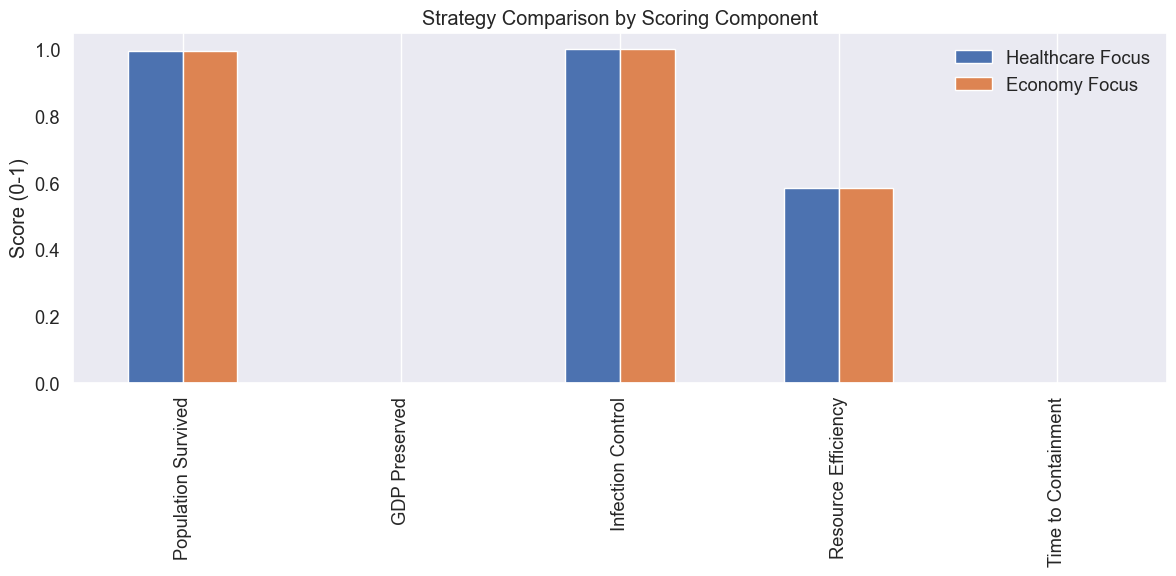

In [10]:
# Compare scoring components
healthcare_scores = {
    'Population Survived': results_healthcare.get('population_survived', 0),
    'GDP Preserved': results_healthcare.get('gdp_preserved', 0),
    'Infection Control': results_healthcare.get('infection_control', 0),
    'Resource Efficiency': results_healthcare.get('resource_efficiency', 0),
    'Time to Containment': results_healthcare.get('time_to_containment', 0),
    'Final Score': results_healthcare.get('final_score', 0)
}

economy_scores = {
    'Population Survived': results_economy.get('population_survived', 0),
    'GDP Preserved': results_economy.get('gdp_preserved', 0),
    'Infection Control': results_economy.get('infection_control', 0),
    'Resource Efficiency': results_economy.get('resource_efficiency', 0),
    'Time to Containment': results_economy.get('time_to_containment', 0),
    'Final Score': results_economy.get('final_score', 0)
}

# Create comparison dataframe
comparison = pd.DataFrame({
    'Healthcare Focus': healthcare_scores,
    'Economy Focus': economy_scores
})

# Display comparison
display(comparison)

# Visualize comparison
comparison[:-1].plot(kind='bar', figsize=(12, 6))
plt.title('Strategy Comparison by Scoring Component')
plt.ylabel('Score (0-1)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Practice vs. Official Attempts

The competition system supports two modes:

1. **Practice Mode**: Unlimited attempts, results not counted for ranking
2. **Official Mode**: Limited attempts (3 per scenario), results count for leaderboard

Let's make an official attempt with our best strategy:

In [11]:
# Switch to official mode
competition.toggle_practice_mode(is_practice=False)

# Make an official attempt with our best strategy
competition.setup_simulation()
official_results = competition.run_simulation(steps=365, interventions=[progressive_strategy])

# Display official score
competition.display_score(official_results)

Mode set to: Competition
Scenario 'Standard Outbreak' configured with slight variations:
  - R0: 2.44 (base: 2.5)
  - Initial infections: 99 across regions (base: 100)
  - Resources: 1013 (base: 1000)
Simulation configured for scenario: Standard Outbreak


Let's view our attempts, both practice and official:

In [12]:
# Display all attempts
competition.display_player_attempts()

,Timestamp,Scenario,Official,Score,Pop. Survived,GDP,Infection Control,Resources,Containment
0,2025-03-30 09:31,standard,No,0.5858,0.99,0.00,1.00,0.59,0.00
1,2025-03-30 09:31,standard,No,0.5858,0.99,0.00,1.00,0.59,0.00
2,2025-03-30 09:31,standard,No,0.5858,0.99,0.00,1.00,0.59,0.00
3,2025-03-30 09:31,standard,No,0.7826,0.99,0.00,0.99,0.94,0.98
4,2025-03-30 09:31,standard,Yes,0.5858,0.99,0.00,1.00,0.59,0.00


## Advanced Strategies

For advanced competition performance, consider these strategy patterns:

### 1. Adaptive Response Strategy

In [13]:
def adaptive_strategy(engine):
    """Strategy that adapts based on infection rates."""
    infection_threshold = 0.05  # 5% of population
    high_alert_threshold = 0.1  # 10% of population
    
    # We'll use a closure to maintain state between callbacks
    state = {'current_lockdown': 0.0, 'last_infection_rate': 0.0}
    
    def adaptive_response(step, sim_state):
        # Extract current infection rate from state
        current_infection_rate = sim_state.population.infected / sim_state.population.total
        
        # Store for trend analysis
        trend = current_infection_rate - state['last_infection_rate']
        state['last_infection_rate'] = current_infection_rate
        
        # Adjust lockdown based on infection rate and trend
        if current_infection_rate > high_alert_threshold:
            # Severe outbreak - strict measures
            new_lockdown = 0.8
            healthcare_allocation = 400
        elif current_infection_rate > infection_threshold:
            # Moderate outbreak - stronger measures
            new_lockdown = 0.5
            healthcare_allocation = 300
        elif trend > 0.01:  # Rapid growth
            # Early growth - preventive measures
            new_lockdown = 0.4
            healthcare_allocation = 200
        else:
            # Low infection or declining - light measures
            new_lockdown = 0.2
            healthcare_allocation = 100
        
        # Don't change lockdown too abruptly
        max_change = 0.2
        lockdown_change = new_lockdown - state['current_lockdown']
        lockdown_change = max(min(lockdown_change, max_change), -max_change)
        state['current_lockdown'] += lockdown_change
        
        # Apply interventions
        engine.set_lockdown_level(state['current_lockdown'])
        engine.allocate_resources('healthcare', healthcare_allocation)
            
        # Economic support during lockdowns
        if state['current_lockdown'] > 0.4:
            engine.allocate_resources('economic', 150)
    
    # Register callback
    engine.register_step_callback(adaptive_response)

### 2. Regional Strategy

If your simulation engine supports regional interventions, you can implement targeted strategies:

In [14]:
def regional_strategy(engine):
    """Strategy that applies different measures to different regions."""
    # This is a template - for the mock engine this is just an example
    
    # Example of region-specific measures (if supported)
    if hasattr(engine, 'set_regional_lockdown'):
        engine.set_regional_lockdown('capital', 0.7)  # Strict in dense areas
        engine.set_regional_lockdown('major_city_1', 0.6)
        engine.set_regional_lockdown('major_city_2', 0.6)
        engine.set_regional_lockdown('rural_area_1', 0.3)  # Lighter in rural areas
    else:
        # Fall back to global measures if regional not supported
        engine.set_lockdown_level(0.5)  # Medium lockdown
    
    # Regional resource allocation (if supported)
    if hasattr(engine, 'allocate_regional_resources'):
        engine.allocate_regional_resources('capital', 'healthcare', 200)
        engine.allocate_regional_resources('major_city_1', 'healthcare', 150)
        engine.allocate_regional_resources('major_city_2', 'healthcare', 150)
        engine.allocate_regional_resources('rural_area_1', 'healthcare', 50)
    else:
        # Fall back to global resource allocation
        engine.allocate_resources('healthcare', 500)

### 3. Phase-Based Strategy

A more sophisticated version of the progressive strategy that defines clear phases of the epidemic response:

In [15]:
def phase_based_strategy(engine):
    """Strategy that implements a phased pandemic response plan."""
    # Phase definitions
    phases = {
        'containment': {
            'description': 'Early containment phase',
            'lockdown': 0.3,
            'resources': {'healthcare': 150, 'testing': 100, 'economic': 50}
        },
        'mitigation': {
            'description': 'Active outbreak mitigation phase',
            'lockdown': 0.7,
            'resources': {'healthcare': 300, 'testing': 150, 'economic': 200}
        },
        'recovery': {
            'description': 'Declining cases recovery phase',
            'lockdown': 0.4,
            'resources': {'healthcare': 200, 'economic': 300, 'testing': 100}
        },
        'endemic': {
            'description': 'Long-term management phase',
            'lockdown': 0.2,
            'resources': {'healthcare': 100, 'economic': 150, 'testing': 50}
        }
    }
    
    # State tracking
    state = {'current_phase': 'containment', 'peak_infection_rate': 0.0, 'declining_count': 0}
    
    def phase_controller(step, sim_state):
        # Determine infection rate
        infection_rate = sim_state.population.infected / sim_state.population.total
        
        # Track peak infection
        if infection_rate > state['peak_infection_rate']:
            state['peak_infection_rate'] = infection_rate
            state['declining_count'] = 0
        elif infection_rate < state['peak_infection_rate']:
            state['declining_count'] += 1
        
        # Phase transitions
        current = state['current_phase']
        
        if current == 'containment' and infection_rate > 0.05:
            # Outbreak growing beyond containment
            state['current_phase'] = 'mitigation'
            print(f"Step {step}: Transitioning to mitigation phase")
            
        elif current == 'mitigation' and state['declining_count'] > 20:
            # Sustained decline in cases
            state['current_phase'] = 'recovery'
            print(f"Step {step}: Transitioning to recovery phase")
            
        elif current == 'recovery' and infection_rate < 0.01 and step > 300:
            # Long-term low infection rate
            state['current_phase'] = 'endemic'
            print(f"Step {step}: Transitioning to endemic management phase")
        
        # Apply the current phase settings
        phase = phases[state['current_phase']]
        
        engine.set_lockdown_level(phase['lockdown'])
            
        for resource_type, amount in phase['resources'].items():
            engine.allocate_resources(resource_type, amount)
    
    # Register callback
    engine.register_step_callback(phase_controller)

## Submitting and Viewing Results

Once you've developed and tested your strategies, you'll want to make official attempts and see how you compare to other competitors.

In [16]:
# View the current leaderboard
competition.display_leaderboard()

,Rank,Player,Standard Score,Challenging Score,Average Score
0,1,Your Name,0.6451,0.6451,0.6451
1,2,Your Name,0.6451,0.6451,0.6451
2,3,Your Name,0.6451,0.6451,0.6451
3,4,Your Name,0.6451,0.6451,0.6451
4,5,Your Name,0.5861,0.5861,0.5861
5,6,Your Name,0.5858,0.5858,0.5858
6,7,Your Name,0.5857,0.5857,0.5857


### Submitting Your Strategy Document

As part of the competition, you should document your strategy approach:

In [17]:
strategy_document = """
# My Epidemic Management Strategy

## Overview
My strategy aims to balance health outcomes and economic impacts through an adaptive, phase-based approach.

## Key Components
1. **Early Detection**: Invest in testing early to identify outbreaks
2. **Adaptive Measures**: Scale interventions based on current infection rates
3. **Economic Support**: Provide economic relief during strict lockdowns
4. **Healthcare Investment**: Prioritize healthcare capacity early

## Implementation
The strategy uses a state machine approach with distinct phases:
- Containment phase: Early, targeted measures
- Mitigation phase: Strict measures during peak infection
- Recovery phase: Gradual reopening as cases decline
- Endemic phase: Long-term management with minimal restrictions

Transitions between phases are triggered by infection rate thresholds and trends.
"""

# Submit your strategy document
competition.submit_strategy_document(strategy_doc=strategy_document)

True

### Making Official Attempts for All Scenarios

To complete your competition entry, you need to make official attempts for all available scenarios:

In [18]:
# Set competition mode
competition.toggle_practice_mode(is_practice=False)

# For each scenario
for scenario_id in ["standard", "challenging"]:  # Add any other required scenarios
    print(f"\nRunning official attempt for {scenario_id} scenario")
    
    # Set up scenario
    competition.set_scenario(scenario_id)
    competition.setup_simulation()
    
    # Run with your best strategy
    # You would use your actual best strategy here
    results = competition.run_simulation(steps=730, interventions=[phase_based_strategy])
    
    # Display results
    print(f"Results for {scenario_id} scenario:")
    competition.display_score(results)

Mode set to: Competition

Running official attempt for standard scenario
Current scenario set to: Standard Outbreak (standard)
Scenario 'Standard Outbreak' configured with slight variations:
  - R0: 2.38 (base: 2.5)
  - Initial infections: 98 across regions (base: 100)
  - Resources: 985 (base: 1000)
Simulation configured for scenario: Standard Outbreak
Results for standard scenario:



Running official attempt for challenging scenario
Current scenario set to: Challenging Outbreak (challenging)
Scenario 'Challenging Outbreak' configured with slight variations:
  - R0: 3.38 (base: 3.5)
  - Initial infections: 97 across regions (base: 100)
  - Resources: 687 (base: 700)
Simulation configured for scenario: Challenging Outbreak
Results for challenging scenario:


### Final Leaderboard

After making all your official attempts, check your position on the leaderboard:

In [19]:
# Display final leaderboard
competition.display_leaderboard()

# Save a copy of the leaderboard (optional)
competition.save_leaderboard(output_file="tutorial_leaderboard.html")

,Rank,Player,Standard Score,Challenging Score,Average Score
0,1,Your Name,0.6451,0.6451,0.6451
1,2,Your Name,0.6451,0.6451,0.6451
2,3,Your Name,0.6451,0.6451,0.6451
3,4,Your Name,0.6451,0.6451,0.6451
4,5,Your Name,0.5861,0.5861,0.5861
5,6,Your Name,0.5858,0.5858,0.5858
6,7,Your Name,0.5858,0.5858,0.5858
7,8,Your Name,0.5857,0.5857,0.5857


Leaderboard saved to tutorial_leaderboard.html


## Conclusion

Congratulations! You now have a solid understanding of the XPECTO Epidemic 2.0 Competition System and have developed some strategies for tackling the challenges. Key takeaways:

1. The competition evaluates your epidemic management performance across multiple dimensions
2. Effective strategies balance health outcomes, economic impacts, and resource efficiency
3. Adaptive strategies that respond to changing conditions perform better than static approaches
4. Official attempts count for the leaderboard; use practice mode to refine your approach

Good luck in the competition, and may your epidemic management skills lead to the best outcomes for your simulated population!

## Clean Up Tutorial Data

If you want to clean up the data created during this tutorial, uncomment and run the following cell:

In [20]:
# import shutil
# shutil.rmtree("tutorial_data", ignore_errors=True)
# print("Tutorial data removed")